# <b>신경망 학습</b></h1>
<br>#학습 #손실함수 <br><br>
학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
손실함수 : 신경망이 학습할 수 있도록 해주는 지표. / (목표) 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것(method ex. 경사법) <br><br>


## <b>데이터에서 학습한다!</b><br>
### <b>데이터 주도 학습</b><br><br>
<img src = ".\deep_learning_images\fig 4-2.png" height = 40% width = 40% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[그림 4-2] 사람, 기계, 신경망의 학습 방식</span></div>
<br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. 사람 
</span><br>


: 경험과 직관을 단서로 시행착오를 거듭하며 일을 진행 <br>
: 즉, 다소 복잡한 프로세스로 진행 <br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    2. ML 
</span><br>


: 사람의 개입을 최소화하고 수집한 데이터로부터 "패턴"을 찾으려 시도 <br>
: 학습을 진행하며 패턴을 찾아냄 <br>
: but, feature는 사람이 설계한다는 한계가 있음 <br>

> <b>어떻게 패턴을 찾을까?</b>
>> ex. feature 추출<br>
>>: feauter란, 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기<br>
>>: 이미지의 특징은 보통 벡터로 기술<br>
>>: 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용<br>


<br>
<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    3. DL
</span><br>


: = 종단간 기계학습(end-to-end ML) <br>
: 즉, 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻음 <br><br><br>

### <b>훈련 데이터와 시험 데이터</b><br><br>
<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. 훈련 데이터  
    <span style = 'font-weight : normal'>
        (training data)
    </span> 
</span><br>


: 최적의 매개변수를 찾음 (모델 학습 진행)<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    2. 시험 데이터  
    <span style = 'font-weight : normal'>
        (test data)
    </span> 
</span><br>


: 훈련한 모델의 실력을 평가

> <b>왜 훈련셋과 시험셋을 나눌까?</b><br><br>
>: 범용적으로 사용할 수 있는 모델인지 "범용 능력(= 새로운 문제를 올바르게 풀어내는 능력, 기계학습의 목표)"을 제대로 평가하기 위해

> <b>오버피팅(overfitting)</b><br><br>
>: 한 데이터셋에만 지나치게 최적화된 상태<br>
>: 오버피팅을 피하는 것이 기계학습의 중요한 과제

<br>


## <b>손실 함수</b><br>
### <b>평균 제곱 오차</b><br>





## <b>수치 미분</b><br>
### <b>미분...</b><br>


<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. 미분
</span><br><br>
: 미분이란, 한 순간의 "변화량"을 표시한 것<br>
: 즉, 아래의 [식 4.4]는 x에 대한 f(x)의 변화량을 나타냄<br>

<img src = ".\deep_learning_images\e 4.4.png" height = 20% width = 20% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[식 4.4] 미분</span></div>


<br>
<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    2. 미분 구현
</span><br><br>
: 미분 구현의 예 => 정확도가 떨어진다!(안정성이 떨어진다)<br>

```python
def numerical_diff(f, x) :
    h = 10e-50
    return (f(x+h) - f(x)) / h
```

> <b>개선해야 할 점</b><br><br>
> <b>1. 반올림 오차(rounding error) 문제</b><br><br>
> : 너무 작은 값을 이용하면 컴퓨터로 계산하는데 오차가 발생하게 됨<br><br>
> <b>2. 함수 f의 전방 차분</b> <br><br>
> : 차분이란, 임의 두점에서의 함수 값들의 차이를 일컬음<br>
> : 위의 [식 4.4]의 우변에서, 분자는 차분을 계산하고 있지만, 애당초에 이 계산에는 오차가 존재(수없이 쪼개질 수 있다는 한계)<br>
> : 이 한계는 h를 무한히 0으로 좁히는 것이 불가능해 발생<br>
> <img src = ".\deep_learning_images\fig 4-5.png" height = 30% width = 30% align = "center">
> <div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[그림 4-5] 차분의 한계</span></div>

> <b>개선 방법</b><br><br>
> <b>1. 반올림 오차(rounding error) 문제</b><br><br>
> : 일반적으로 "10e-4"정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있음<br><br>
> <b>2. 함수 f의 전방 차분</b> <br><br>
> : 중심 차분(중앙 차분)을 이용하여 차분 계산 <br>
> : 즉, <br>
> <div style="text-align: center">$f(x+h) - f(x-h)$</div>

<br>: 구현

In [3]:
def numerical_diff(f, x) :
    h = 10e-4 # h->0
    return (f(x+h) - f(x-h)) / (2*h)

### <b>수치 미분의 예</b><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. 수치 미분
</span><br><br>
: 위와 같이 아주 작은 차분으로 미분하는 것<br>
: 해석적으로 미분이 안되는 수식(복잡해서)을 해결하기 위해<br>
: '근사치', 오차가 존재<br>
: 미방에서도 쓰임<br>

> cf. <b>해석적 미분</b><br><br>
> :  수식을 전개해 미분하는 것<br>
> :  오차를 포함하지 않는 '진정한 미분' 값

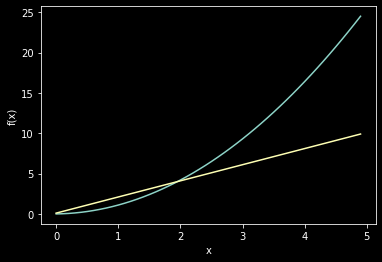

x = 5일 때, y = 10.100000000003106
x = 10일 때, y = 20.099999999992235


In [7]:
'''
# 수치 미분 예제
# y = 0.01x^2 + 0.1x
'''
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

# 예. y = 0.01x^2 + 0.1x
def func_1(x) :
    return x**2 + 0.1*x

x = np.arange(0.0, 5.0, 0.1) # array size : 20, 간격 : 0.1
y = func_1(x)

# draw y = 0.01x^2 + 0.1x
plt.style.use(['dark_background'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, numerical_diff(func_1, x))


# Update
plt.show()

# 수치미분
print("x = 5일 때, y =", numerical_diff(func_1, 5))
print("x = 10일 때, y =", numerical_diff(func_1, 10))

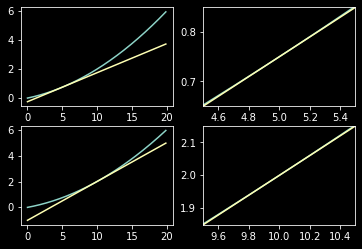

In [31]:
'''
# 접선 포함하여 그리기
'''
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d * x
    return lambda t: d * t + y

tf1 = tangent_line(func_1, 5)
y2 = tf1(x)

tf2 = tangent_line(func_1, 10)
y3 = tf2(x)

# draw
plt.xlabel("x")
plt.ylabel("f(x)")

# x = 5일 때
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.plot(x, y2)

plt.subplot(2, 2, 2)
plt.xlim(4.5, 5.5)
plt.ylim(tf1(4.5), tf1(5.5))
plt.plot(x, y)
plt.plot(x, y2)

# x = 10일 때
plt.subplot(2, 2, 3)
plt.plot(x, y)
plt.plot(x, y3)

plt.subplot(2, 2, 4)
plt.xlim(9.5, 10.5)
plt.ylim(tf2(9.5), tf2(10.5))
plt.plot(x, y)
plt.plot(x, y3)

# Update
plt.show()

### <b>편미분</b><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. 편미분
</span><br><br>
: 다변수 함수의 특정 변수를 제외한 나머지 변수를 상수로 생각하여 미분<br>
: 특정 장소의 기울기를 구함<br><br>

<img src = https://t1.daumcdn.net/cfile/tistory/99FF48445CAB2E301B height = 20% width = 20% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>편미분의 정의</span></div><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    2. 예
</span><br>
<img src = ".\deep_learning_images\e 4.6.png" height = 15% width = 15% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[식 4.6]</span></div>
<img src = ".\deep_learning_images\fig 4-8.png" height = 30% width = 30% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[그림 4-8][식 4.6]의 그래프</span></div>

In [34]:
'''
# 편미분 예제
'''

# 문제 1 : x0 = 3, x1 = 4일 때, x_0에 대한 편미분
def func_tmp1(x0) :
    return x0*x0 + 4.0**2.0 # x0^2 + 4^2 (cuz, x1=4)

# 문제 2 : x0 = 3, x1 = 4일 때, x_1에 대한 편미분
def func_tmp2(x1) :
    return 3.0**2.0 + x1*x1 # 3^2 + x1^2 (cuz, x0=3)

print("x0 = 3, x1 = 4일 때, x_0에 대한 편미분 결과 : ", numerical_diff(func_tmp1, 3.0))
print("x0 = 3, x1 = 4일 때, x_1에 대한 편미분 결과 : ", numerical_diff(func_tmp2, 4.0))

x0 = 3, x1 = 4일 때, x_0에 대한 편미분 결과 :  5.999999999998451
x0 = 3, x1 = 4일 때, x_1에 대한 편미분 결과 :  8.000000000000895


: 위는 수치 미분의 결과<br>
: 해석적 미분의 결과와 근접함
<div style = 'text-align : center'>
$f(x_0, x_1) = x_0^2 + x_1^2$<br>
$⇒ f_{x0} = 2x_0 = 6.0$<br>
$⇒ f_{x1} = 2x_1 = 8.0$<br>
</div>